# Download and Explore New York city geographical coordinates dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup # package for parsing HTML and XML document

import csv # implements classes to read and write tabular data in CSV form

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

print('Libraries imported.')

Libraries imported.


In [2]:
#conda install -c menpo wget 

In [3]:
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

In [4]:
data=!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


## Load and explore the data

In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)



## All the relevant data is in the features key, which is basically a list of the neighborhoods. So, define a new variable that includes this data.

In [6]:
neighborhoods_data = newyork_data['features']

## Tranform the data into a pandas dataframe

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)



### Then loop through the data and fill the dataframe one row at a time.

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)



## Use geopy library to get the latitude and longitude values of New York City.

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## Create a map of New York with neighborhoods superimposed on top.

In [ ]:


# create map of Toronto using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork



# Web scrapping of Population and Demographics data of New York city from Wikipedia

## Web scrapping of Population data from wikipedia page using BeautifulSoup

In [130]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

### Load data from CSV

In [131]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')


Data downloaded!


### Remove whitespaces and rename columns

In [132]:
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'persons_sq_mi','County':'persons_sq_km'}, inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte\r\n,Jurisdiction\r\n,Population\r\n,GrossDomesticProduct\r\n,Landarea\r\n,Density\r\n,persons_sq_mi,squarekm,persons/mi2,persons/km2\r\n
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,NaN,NaN,NaN
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,NaN,NaN,NaN
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,NaN,NaN,NaN
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,NaN,NaN,NaN
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,NaN,NaN,NaN
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547",NaN,NaN,NaN
6,State of New York,"19,453,561","1,731.910","89,000","47,126.40","122,056.82",412,NaN,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\r\n' : 'Borough',
                   'Jurisdiction\r\n':'County',
                   'Population\r\n':'Estimate_2019', 
                   'Landarea\r\n':'GDP/capita',
                    'Density\r\n':'square miles','persons_sq_mi':'square km'}, inplace=True)
Pop_data

,Borough,County,Estimate_2019,GrossDomesticProduct\r\n,GDP/capita,square miles,square km,squarekm,persons/mi2,persons/km2\r\n
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,NaN,NaN,NaN
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,NaN,NaN,NaN
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,NaN,NaN,NaN
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,NaN,NaN,NaN
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,NaN,NaN,NaN
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547",NaN,NaN,NaN
6,State of New York,"19,453,561","1,731.910","89,000","47,126.40","122,056.82",412,NaN,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace ('\r\n') from each string from left and right sides

In [17]:
Pop_data['Borough']=Pop_data['Borough'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['County']=Pop_data['County'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['Estimate_2017']=Pop_data['Estimate_2017'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['persons_sq_mi ']=Pop_data['persons_sq_mi'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['persons/km2\r\n']=Pop_data['persons/km2\r\n'].replace(to_replace='\r\n', value='', regex=True)
Pop_data

,Borough,County,Estimate_2017,GrossDomesticProduct\r\n,square_miles,square_km,persons_sq_mi,squarekm,persons/mi2,persons/km2\r\n,persons_sq_mi
0,The Bronx,Bronx,"1,418,207",42.695\r\n,"30,100",42.10,109.04\r\n,NaN,NaN,NaN,109.04
1,Brooklyn,Kings,"2,559,903",91.559\r\n,"35,800",70.82,183.42\r\n,NaN,NaN,NaN,183.42
2,Manhattan,New York,"1,628,706",600.244\r\n,"368,500",22.83,59.13\r\n,NaN,NaN,NaN,59.13
3,Queens,Queens,"2,253,858",93.310\r\n,"41,400",108.53,281.09\r\n,NaN,NaN,NaN,281.09
4,Staten Island,Richmond,"476,143",14.514\r\n,"30,500",58.37,151.18\r\n,NaN,NaN,NaN,151.18
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547",NaN,NaN,NaN,"27,547"
6,State of New York,"19,453,561","1,731.910","89,000","47,126.40","122,056.82",412,NaN,NaN,NaN,412
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove 'NAN'

In [135]:
Pop_data = Pop_data.fillna('')
Pop_data

,Borough,County,Estimate_2019,GrossDomesticProduct\r\n,GDP/capita,square miles,square km,squarekm,persons/mi2,persons/km2\r\n
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,,,
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,,,
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,,,
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,,,
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,,,
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547",,,
6,State of New York,"19,453,561","1,731.910","89,000","47,126.40","122,056.82",412,,,
7,Sources:[12][13][14] and see individual boroug...,,,,,,,,,


### Drop the last row

In [136]:
Pop_data=Pop_data[0:-1]
Pop_data

,Borough,County,Estimate_2019,GrossDomesticProduct\r\n,GDP/capita,square miles,square km,squarekm,persons/mi2,persons/km2\r\n
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,,,
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,,,
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,,,
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,,,
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,,,
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547",,,
6,State of New York,"19,453,561","1,731.910","89,000","47,126.40","122,056.82",412,,,


In [141]:
Pop_data.to_excel('BON2_POPULATION.xlsx',index=False) #save data frame

In [143]:
Pop_data=pd.read_excel('BON2_POPULATION.xlsx')
Pop_data

,Borough,County,Estimate_2019,GrossDomesticProduct\r\n,GDP/capita,square miles,square km,squarekm,persons/mi2,persons/km2\r\n
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,NaN,33867,13006
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,NaN,36147,13957
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,NaN,71341,27544
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,NaN,20767,8018
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,NaN,8157,3150
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547",NaN,27547,10636
6,State of New York,"19,453,561","1,731.910","89,000","47,126.40","122,056.82",412,NaN,412,159


# DEMOGRAPHICS DATA

In [21]:
Demo_data=pd.read_excel('NYC_DEMO.xlsx')
print('Data downloaded!')

Data downloaded!


In [22]:
Demo_data

,Racialcomposition,2010,1990,1970,1940
0,White,0.440,0.523,0.766,0.936
1,—Non-Hispanic,0.333,0.432,0.629,0.920
2,Black or African American,0.255,0.287,0.211,0.061
3,Hispanic or Latino (of any race),0.286,0.244,0.162,0.016
4,Asian,0.127,0.070,0.012,0.000


## Download and Explore New York city and its Boroughs Cuisine dataset

In [24]:
NYC_CUISINE=pd.read_excel('BON3_NYC_CUISINE.xlsx')
print('Data downloaded!')

Data downloaded!


In [25]:
NYC_CUISINE

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"
5,The Bronx,Riverdale,Jewish
6,The Bronx,South Bronx,"Puerto Rican, Dominican"
7,The Bronx,Wakefield,"Jamaican, West Indian"
8,The Bronx,Woodlawn,Irish
9,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."


In [26]:
NYC_CUISINE.shape

(57, 3)

In [27]:
print(NYC_CUISINE.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [28]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Manhattan,13
Queens,13
The Bronx,9
Staten Island,3


## NEW YORK CITY CUISINE - WORD CLOUD

In [29]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [30]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [31]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [32]:
stopwords = set(STOPWORDS)

In [33]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

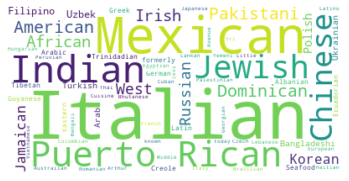

<Figure size 2160x3240 with 0 Axes>

In [34]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [35]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [36]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [37]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [38]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [39]:
stopwords = set(STOPWORDS)

In [40]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

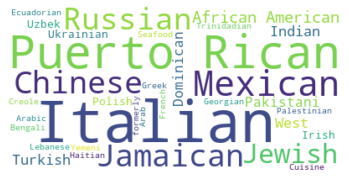

<Figure size 2160x3240 with 0 Axes>

In [41]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

# QUEENS CUISINE - WORD CLOUD

In [42]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills; Kew Gardens Hills; Rego Park,"Jewish, Russian and Uzbek"
4,Queens,Howard Beach; Ozone Park,Italian


In [43]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,Italian
5,German and Polish
6,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,American; African; Creole
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, Trinidadian, Pakistani, Bang..."


In [44]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [45]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [46]:
stopwords = set(STOPWORDS)

In [47]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

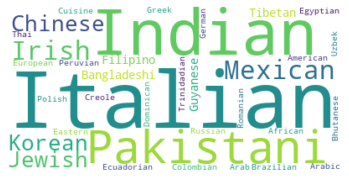

<Figure size 2160x3240 with 0 Axes>

In [48]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

# MANHATTAN CUISINE - WORD CLOUD

In [49]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian and Middle Eastern
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."


In [50]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian and Middle Eastern
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin American"
9,"Indian, Pakistani and Bangladeshi"


In [51]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [52]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [53]:
stopwords = set(STOPWORDS)

In [54]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

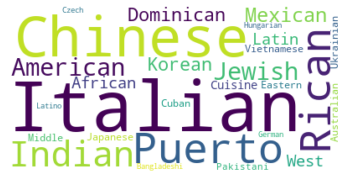

<Figure size 2160x3240 with 0 Axes>

In [55]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

# THE BRONX CUISINE - WORD CLOUD

In [56]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [57]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [58]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [59]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [60]:
stopwords = set(STOPWORDS)

In [61]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

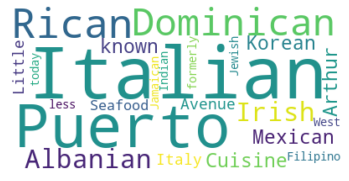

<Figure size 2160x3240 with 0 Axes>

In [62]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Download and Explore Farmers Market dataset

In [63]:
# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

FM_NYC=pd.read_csv('DOHMH_Farmers_Markets.csv')

In [64]:
FM_NYC.head()

,Borough,Market Name,Street Address,Community District,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)"
3,Manhattan,Fulton Stall Market,Pier 17 Square,101,40.705799,-74.002572,Sunday,11am-5pm,04/26/2020-11/22/2020,Yes,No,No,No,"(40.705799, -74.002572)"
4,Queens,Corona Greenmarket,Roosevelt Ave & 103rd St,404,40.749811,-73.861668,Friday,8am - 3pm,6/19 to 11/27,Yes,No,No,No,"(40.749811, -73.861668)"




Website-https://www.grownyc.org/greenmarketco/foodbox
GrowNYC's Fresh Food Box Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.

A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

So, in this we will filter farmers' market data and explore it.


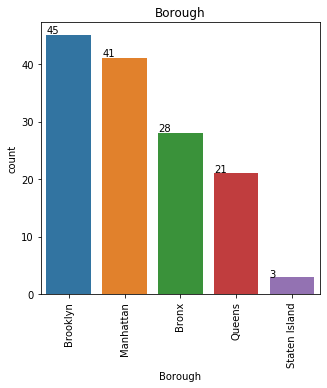

In [65]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

## Use geopy library to get the latitude and longitude values of New York City.

In [66]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


# Create a map of New York with Facility name and Borough of Farmers Market superimposed on top.

In [ ]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC['Latitude'], FM_NYC['Longitude'], FM_NYC['Market Name'], FM_NYC['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets

# Segmenting and Clustering Neighborhoods - Brooklyn and Manhattan

In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan. We will use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in Brooklyn and Manhattan and their emerging clusters.

Table of Contents

1. Download and Explore Dataset
2. Explore Neighborhoods in Brooklyn and Manhattan
3. Analyze Each Neighborhood
4. Cluster Neighborhoods and Examine Clusters

# 1. Download and Explore Dataset

In [68]:
NYC_Geo=pd.read_csv('BON1_NYC_GEO.csv')
print('Data downloaded!')

Data downloaded!


In [69]:
NYC_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [70]:
NYC_Geo['Borough'].value_counts().to_frame()

,Borough
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40


In [71]:
NYC_Geo.shape

(306, 4)

In [72]:
print(NYC_Geo.Borough.unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [73]:
NYC_Geo.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

# Segmenting and Clustering Neighborhoods - Brooklyn and Manhattan

In [74]:
BM_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Brooklyn')|(NYC_Geo['Borough'] == 'Manhattan')]
BM_Geo = BM_Geo.reset_index(drop=True)
BM_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [75]:
BM_Geo.shape

(110, 4)

## Use geopy library to get the latitude and longitude values of New York City. The geograpical coordinate of New York City are 40.7308619, -73.9871558..

In [76]:
import time
start_time = time.time()

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

print("--- %s seconds ---" % round((time.time() - start_time), 2))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.
--- 0.28 seconds ---


## Create a map of Brooklyn and Manhattan with neighborhoods superimposed on top.

In [ ]:
# create map of Toronto using latitude and longitude values
map_BM = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BM_Geo['Latitude'], BM_Geo['Longitude'], BM_Geo['Borough'], BM_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BM)  
    
map_BM

## Define Foursquare Credentials and Version

In [78]:
CLIENT_ID = 'YT1EYSV2MX0X35OFVRLE5B33CS2ZY0DLCGP43N2WNL4C3NDJ' # your Foursquare ID
CLIENT_SECRET = 'WUK13HCYDMWYEODDK0VJHOLMCSYFBMNE1AKT5XZXVZEEOYSK' # your Foursquare Secret
ACCESS_TOKEN = 'TOYT4WCCHZ1ZM1BVOTKQBVBMCDEDXGEVFECWEEVJXDPRNLEC' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: YT1EYSV2MX0X35OFVRLE5B33CS2ZY0DLCGP43N2WNL4C3NDJ
CLIENT_SECRET:WUK13HCYDMWYEODDK0VJHOLMCSYFBMNE1AKT5XZXVZEEOYSK


## 2. Explore Neighborhoods in Brooklyn and Manhattan

In [79]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Run the above function on each neighborhood and create a new dataframe called BM_venues.

In [80]:
BM_venues = getNearbyVenues(names=BM_Geo['Neighborhood'],
                                  latitudes=BM_Geo['Latitude'],
                                  longitudes=BM_Geo['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BM_venues['Venue Category']),
      len(BM_venues['Venue Category'].unique())))

BM_venues.to_csv('BM_venues.csv', sep=',', encoding='UTF8')
BM_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


### Download data from BM_venues.csv

In [81]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BM_venues = pd.read_csv('BM_venues.csv', skiprows=1, names=colnames)
BM_venues.columns = BM_venues.columns.str.replace(' ', '')
BM_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [82]:
BM_venues.shape

(9581, 7)

### Visualize the BM_Venues data

In [83]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    # Use geopy library to get the latitude and longitude values 
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Borough_name) #'Brooklyn, NY'
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    # To verify the number of Boroughs and Neighborhoods in the extracted data
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['VenueCategory'].unique()),
          len(Borough_neighborhoods['Neighborhood'].unique())))
    
    # create map of city using latitude and longitude values
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

    # add markers to map
    for lat, lng, venue, category in zip(Borough_neighborhoods['VenueLatitude'], Borough_neighborhoods['VenueLongitude'], Borough_neighborhoods['Venue'], Borough_neighborhoods['VenueCategory']):
        label = '{}, {}'.format(category, venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  

    return map_Borough

In [ ]:
Venues_Map('New York City, NY', BM_venues)

In [85]:
BM_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 397
Coffee Shop                                 350
Italian Restaurant                          234
Bakery                                      229
Bar                                         229
Café                                        205
Park                                        205
Grocery Store                               195
American Restaurant                         167
Ice Cream Shop                              147
Mexican Restaurant                          145
Deli / Bodega                               140
Sandwich Place                              138
Cocktail Bar                                138
Gym / Fitness Center                        138
Chinese Restaurant                          136
Caribbean Restaurant                        135
Gym                                         132
Bagel Shop                                  120
Wine Shop                                   119
Japanese Restaurant       

In [86]:
BM_venues.groupby('Neighborhood').count()

,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Bath Beach,100,100,100,100,100,100
Battery Park City,100,100,100,100,100,100
Bay Ridge,100,100,100,100,100,100
Bedford Stuyvesant,100,100,100,100,100,100
Bensonhurst,100,100,100,100,100,100
Bergen Beach,9,9,9,9,9,9
Boerum Hill,100,100,100,100,100,100
Borough Park,47,47,47,47,47,47
Brighton Beach,90,90,90,90,90,90


### Find out how many unique categories can be curated from all the returned venues

In [87]:
print('There are {} uniques categories.'.format(len(BM_venues['VenueCategory'].unique())))

There are 409 uniques categories.


### 3. Analyze Each Neighborhood

In [88]:
# one hot encoding
BM_onehot = pd.get_dummies(BM_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BM_onehot.columns)

# add neighborhood column back to dataframe
BM_onehot['Neighborhood'] = BM_venues['Neighborhood'] 

# move neighborhood column to the first column
BM_onehot = BM_onehot[column_names]

BM_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restau

### To filter only Restaurant data

In [89]:
restaurant_List = []
search = 'Restaurant'
for i in BM_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [90]:
restaurant_List

['African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Brazilian Restaurant',
 'Burmese Restaurant',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Hong Kong Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
 'Jewish Restaurant',
 'Kebab Restaurant',
 'Korean Restauran

In [91]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
BM_restaurant = BM_onehot[col_name]
BM_restaurant = BM_restaurant.iloc[:,1::]

In [92]:
BM_restaurant_grouped = BM_restaurant.groupby('Neighborhood').sum().reset_index()

In [93]:
BM_restaurant_grouped['Total'] = BM_restaurant_grouped .sum(axis=1)

## 4. Cluster Neighborhoods and Examine Clusters

In [94]:
BM_grouped_clustering = BM_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BM_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BM_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3939537519170997
For n_clusters=3, The Silhouette Coefficient is 0.3110224243597887
For n_clusters=4, The Silhouette Coefficient is 0.2308302570234498
For n_clusters=5, The Silhouette Coefficient is 0.2489818095172153
For n_clusters=6, The Silhouette Coefficient is 0.2418037212826542
For n_clusters=7, The Silhouette Coefficient is 0.2163510533478047
For n_clusters=8, The Silhouette Coefficient is 0.2544207493506694
For n_clusters=9, The Silhouette Coefficient is 0.1997590154314507


As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.
For n_clusters=2, The Silhouette Coefficient is 0.4070573233323876

In [95]:


# set number of clusters
kclusters = 2

BM_grouped_clustering = BM_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BM_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_



array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [96]:
BM_results = pd.DataFrame(kmeans.cluster_centers_)
BM_results.columns = BM_grouped_clustering.columns
BM_results.index = ['cluster0','cluster1']
BM_results['Total Sum'] = BM_results.sum(axis = 1)
BM_results

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.061224,1.081633,2.775558e-17,0.020408,0.102041,4.163336e-17,0.020408,-6.938894e-18,0.020408,-3.469447e-18,-1.387779e-17,1.326531,0.020408,1.00000,2.040816e-02,-6.938894e-18,0.102041,-3.469447e-18,-6.938894e-18,2.775558e-17,0.102041,-6.938894e-18,-3.469447e-18,0.020408,0.204082,0.979592,2.775558e-17,0.408163,0.040816,0.020408,0.040816,2.081668e-17,-1.734723e-18,-3.469447e-18,0.142857,-6.938894e-18,1.000000,0.020408,0.612245,-3.469447e-18,4.081633e-02,0.081633,0.020408,0.408163,-6.938894e-18,2.081668e-17,0.285714,0.571429,0.224490,-3.469447e-18,-6.938894e-18,0.163265,-3.469447e-18,-3.469447e-18,0.183673,6.122449e-02,-3.469447e-18,0.061224,0.591837,0.142857,-3.469447e-18,0.571429,-1.734723e-18,2.081668e-17,-3.469447e-18,0.061224,0.163265,0.142857,0.591837,-1.734723e-18,0.040816,0.020408,0.040816,4.081633e-02,0.163265,-3.469447e-18,0.061224,2.081668e-17,-1.734723e-18,0.163265,-3.469447e-18,0.142857,12.408163,24.816327
cluster1,0.098361,1.868852,1.147541e-01,0.098361,0.606557,1.639344e-01,0.114754,6.557377e-02,0.016393,4.918033e-02,1.311475e-01,1.147541,0.032787,1.42623,3.469447e-18,9.836066e-02,0.245902,3.278689e-02,6.557377e-02,1.147541e-01,0.163934,6.557377e-02,3.278689e-02,0.163934,0.196721,0.295082,1.147541e-01,0.934426,0.081967,0.573770,0.081967,8.196721e-02,1.639344e-02,3.278689e-02,0.803279,6.557377e-02,3.032787,0.032787,1.393443,4.918033e-02,6.938894e-18,0.508197,0.016393,0.721311,6.557377e-02,8.196721e-02,0.557377,1.918033,0.508197,3.278689e-02,6.557377e-02,0.655738,4.918033e-02,4.918033e-02,0.163934,-1.387779e-17,3.278689e-02,0.262295,0.672131,0.213115,3.278689e-02,0.901639,1.639344e-02,8.196721e-02,3.278689e-02,0.049180,0.508197,0.491803,1.360656,1.639344e-02,0.049180,0.016393,0.377049,6.938894e-18,1.032787,4.918033e-02,0.245902,8.196721e-02,1.639344e-02,0.803279,3.278689e-02,0.557377,28.032787,56.065574


The Total and Total Sum of cluster0 has smallest value. It shows that the market is not saturated.

### Dataframe with Neighborhood,Cluster No and Total Sum

In [97]:
BM_results_merged = pd.DataFrame(BM_restaurant_grouped['Neighborhood'])

BM_results_merged['Total'] = BM_restaurant_grouped['Total']
BM_results_merged = BM_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [98]:
print(BM_results_merged.shape)
BM_results_merged

(110, 3)


,Neighborhood,Total,Cluster_Labels
0,Bath Beach,35,1
1,Battery Park City,10,0
2,Bay Ridge,34,1
3,Bedford Stuyvesant,21,1
4,Bensonhurst,30,1
5,Bergen Beach,5,0
6,Boerum Hill,17,0
7,Borough Park,7,0
8,Brighton Beach,19,0
9,Broadway Junction,8,0


### Merge BM_results_merged with BM_Geo

In [99]:
BM_merged = BM_Geo

BM_merged = BM_merged.join(BM_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(BM_merged.shape)
BM_merged.head(10) # check the last columns!

(110, 6)


,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,13,0
1,Brooklyn,Bay Ridge,40.625801,-74.030621,34,1
2,Brooklyn,Bensonhurst,40.611009,-73.995180,30,1
3,Brooklyn,Sunset Park,40.645103,-74.010316,37,1
4,Brooklyn,Greenpoint,40.730201,-73.954241,20,0
5,Brooklyn,Gravesend,40.595260,-73.973471,7,0
6,Brooklyn,Brighton Beach,40.576825,-73.965094,19,0
7,Brooklyn,Sheepshead Bay,40.586890,-73.943186,31,1
8,Brooklyn,Manhattan Terrace,40.614433,-73.957438,17,0
9,Brooklyn,Flatbush,40.636326,-73.958401,33,1


### Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BM_merged['Latitude'], BM_merged['Longitude'], BM_merged['Neighborhood'], BM_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## List Neighborhoods of Interest in New York City

### Cluster 1 : Saturated Markets

In [101]:
BM_merged[BM_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Brooklyn,Bay Ridge,40.625801,-74.030621,34,1
1,Brooklyn,Bensonhurst,40.611009,-73.995180,30,1
2,Brooklyn,Sunset Park,40.645103,-74.010316,37,1
3,Brooklyn,Sheepshead Bay,40.586890,-73.943186,31,1
4,Brooklyn,Flatbush,40.636326,-73.958401,33,1
5,Brooklyn,Crown Heights,40.670829,-73.943291,22,1
6,Brooklyn,Kensington,40.642382,-73.980421,21,1
7,Brooklyn,Windsor Terrace,40.656946,-73.980073,21,1
8,Brooklyn,Prospect Heights,40.676822,-73.964859,32,1
9,Brooklyn,Williamsburg,40.707144,-73.958115,24,1


### Cluster 0 : Untapped Markets

In [102]:
BM_merged[BM_merged['Total'] == 0].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels


There are no Untapped Markets for Restaurant business in Brooklyn and Manhattan.

# Segmenting and Clustering Neighborhoods - Bronx, Queens and Staten Island

In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Bronx, Queens and Staten Island.

Table of Contents

1. Download and Explore Dataset
2. Explore Neighborhoods in Bronx, Queens and Staten Island
3. Analyze Each Neighborhood
4. Cluster Neighborhoods and Examine Clusters

## 1. Download and Explore Dataset

In [103]:
BQS_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Bronx')|(NYC_Geo['Borough'] == 'Queens')|(NYC_Geo['Borough'] == 'Staten Island')]
BQS_Geo = BQS_Geo.reset_index(drop=True)
BQS_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [104]:
BQS_Geo.shape

(196, 4)

### Create a map of Bronx, Queens and Staten Island with neighborhoods superimposed on top.

In [ ]:
# create map of Toronto using latitude and longitude values
map_BQS = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BQS_Geo['Latitude'], BQS_Geo['Longitude'], BQS_Geo['Borough'], BQS_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BQS)  
    
map_BQS

## 2. Explore Neighborhoods in Bronx, Queens and Staten Island

Run the above function on each neighborhood and create a new dataframe called BQS_venues.

In [107]:
BQS_venues = getNearbyVenues(names=BQS_Geo['Neighborhood'],
                                  latitudes=BQS_Geo['Latitude'],
                                  longitudes=BQS_Geo['Longitude'],
                                  LIMIT=200)

print('The "BQS_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BQS_venues['Venue Category']),
      len(BQS_venues['Venue Category'].unique())))

BQS_venues.to_csv('BQS_venues.csv', sep=',', encoding='UTF8')
BQS_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cam

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy


## Download data from Brooklyn_venues.csv

In [109]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BQS_venues = pd.read_csv('BQS_venues.csv', skiprows=1, names=colnames)
BQS_venues.columns = BQS_venues.columns.str.replace(' ', '')
BQS_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy


### Visualize the BQS_Venues data

In [ ]:
Venues_Map('New York City, NY', BQS_venues)

In [111]:
BQS_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 620
Donut Shop                                  331
Deli / Bodega                               330
Pharmacy                                    285
Italian Restaurant                          285
Sandwich Place                              282
Chinese Restaurant                          262
Grocery Store                               229
Bank                                        229
Bakery                                      223
Park                                        214
Coffee Shop                                 213
Fast Food Restaurant                        197
Bar                                         188
Supermarket                                 180
Ice Cream Shop                              176
Mexican Restaurant                          174
Bus Stop                                    160
Diner                                       160
Bus Station                                 140
Mobile Phone Shop         

### Let's check how many venues were returned for each neighborhood

In [112]:
BQS_venues.groupby('Neighborhood').count()

,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Allerton,69,69,69,69,69,69
Annadale,15,15,15,15,15,15
Arden Heights,22,22,22,22,22,22
Arlington,17,17,17,17,17,17
Arrochar,22,22,22,22,22,22
Arverne,36,36,36,36,36,36
Astoria,100,100,100,100,100,100
Astoria Heights,76,76,76,76,76,76
Auburndale,100,100,100,100,100,100


## Let's find out how many unique categories can be curated from all the returned venues

In [113]:
print('There are {} uniques categories.'.format(len(BQS_venues['VenueCategory'].unique())))

There are 394 uniques categories.


## 3. Analyze Each Neighborhood

In [114]:
# one hot encoding
BQS_onehot = pd.get_dummies(BQS_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BQS_onehot.columns)

# add neighborhood column back to dataframe
BQS_onehot['Neighborhood'] = BQS_venues['Neighborhood'] 

# move neighborhood column to the first column
BQS_onehot = BQS_onehot[column_names]

BQS_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Track,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,P

In [115]:
restaurant_List1 = []
search = 'Restaurant'
for i in BQS_onehot.columns :
    if search in i:
        restaurant_List1.append(i)

In [116]:
restaurant_List1

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Brazilian Restaurant',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Himalayan Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Kosher Restaurant',
 'Latin American Restaurant',
 'Malay Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eas

In [117]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List1
BQS_restaurant = BQS_onehot[col_name]
BQS_restaurant = BQS_restaurant.iloc[:,1::]

In [118]:
BQS_restaurant_grouped = BQS_restaurant.groupby('Neighborhood').sum().reset_index()

In [119]:
BQS_restaurant_grouped['Total'] = BQS_restaurant_grouped .sum(axis=1)

# 4. Cluster Neighborhoods and Examine Clusters

In [121]:
BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BQS_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BQS_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5553905167196472
For n_clusters=3, The Silhouette Coefficient is 0.38274896877421866
For n_clusters=4, The Silhouette Coefficient is 0.3477524912207219
For n_clusters=5, The Silhouette Coefficient is 0.33251359031898764
For n_clusters=6, The Silhouette Coefficient is 0.3085238252626861
For n_clusters=7, The Silhouette Coefficient is 0.29100679545326813
For n_clusters=8, The Silhouette Coefficient is 0.2736884243091176
For n_clusters=9, The Silhouette Coefficient is 0.2604042130830032


As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.
For n_clusters=2, The Silhouette Coefficient is 0.5480109689584506

## Run k-means to cluster the neighborhood into 2 clusters.

In [122]:
# set number of clusters
kclusters = 2

BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BQS_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [123]:
BQS_results = pd.DataFrame(kmeans.cluster_centers_)
BQS_results.columns = BQS_grouped_clustering.columns
BQS_results.index = ['cluster0','cluster1']
BQS_results['Total Sum'] = BQS_results.sum(axis = 1)
BQS_results

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.026316,0.052632,1.131579,0.157895,2.894737e-01,0.789474,2.631579e-02,0.157895,0.184211,0.105263,0.500000,2.105263,0.078947,0.026316,0.157895,2.631579e-02,0.157895,0.263158,0.131579,1.578947e-01,2.631579e-02,1.131579,0.184211,0.184211,0.026316,-2.602085e-18,0.815789,0.105263,-2.602085e-18,7.894737e-02,1.578947e-01,1.605263,5.263158e-02,2.763158,0.894737,1.684211,5.263158e-02,1.500000,0.105263,0.210526,2.394737,0.421053,2.631579e-02,0.184211,0.026316,2.631579e-02,0.026316,2.631579e-02,0.578947,0.026316,-2.602085e-18,0.052632,0.184211,0.657895,-2.602085e-18,7.894737e-02,0.684211,0.210526,0.447368,0.157895,0.763158,0.078947,1.026316,7.894737e-02,0.078947,0.078947,-5.204170e-18,1.184211,0.026316,2.105263e-01,0.315789,0.184211,2.631579e-02,0.394737,28.763158,57.526316
cluster1,0.012821,0.019231,0.519231,0.032051,1.457168e-16,0.237179,1.127570e-17,0.019231,0.019231,0.006410,0.525641,1.166667,0.012821,0.019231,0.006410,1.127570e-17,0.019231,0.032051,0.064103,8.673617e-17,1.127570e-17,0.987179,0.025641,0.012821,0.032051,6.410256e-03,0.108974,0.032051,6.410256e-03,4.336809e-17,8.673617e-17,0.185897,2.255141e-17,1.153846,0.256410,0.044872,2.255141e-17,0.269231,0.006410,0.076923,0.532051,0.102564,1.127570e-17,0.038462,0.006410,1.127570e-17,0.006410,1.127570e-17,0.083333,0.006410,6.410256e-03,0.019231,0.012821,0.378205,6.410256e-03,4.336809e-17,0.198718,0.006410,0.051282,0.064103,0.326923,0.038462,0.288462,4.336809e-17,0.006410,0.038462,1.282051e-02,0.134615,0.006410,9.020562e-17,0.006410,0.070513,1.127570e-17,0.032051,8.397436,16.794872


The Total and Total Sum of cluster0 has smallest value. It shows that the market is not saturated.

## Dataframe with Neighborhood,Cluster No and Total Sum

In [124]:
BQS_results_merged = pd.DataFrame(BQS_restaurant_grouped['Neighborhood'],)

BQS_results_merged['Total'] = BQS_restaurant_grouped['Total']
BQS_results_merged = BQS_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [125]:
print(BQS_results_merged.shape)
BQS_results_merged

(194, 3)


,Neighborhood,Total,Cluster_Labels
0,Allerton,16,1
1,Annadale,3,1
2,Arden Heights,4,1
3,Arlington,3,1
4,Arrochar,5,1
5,Arverne,3,1
6,Astoria,34,0
7,Astoria Heights,9,1
8,Auburndale,35,0
9,Bay Terrace,14,1


### Merge BQS_results_merged with BQS_Geo

In [126]:
BQS_merged = BQS_Geo

BQS_merged = BQS_merged.join(BQS_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(BQS_merged.shape)
BQS_merged.head(10) # check the last columns!

(196, 6)


,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Wakefield,40.894705,-73.847201,8,1
1,Bronx,Co-op City,40.874294,-73.829939,12,1
2,Bronx,Eastchester,40.887556,-73.827806,12,1
3,Bronx,Fieldston,40.895437,-73.905643,7,1
4,Bronx,Riverdale,40.890834,-73.912585,9,1
5,Bronx,Kingsbridge,40.881687,-73.902818,19,0
6,Bronx,Woodlawn,40.898273,-73.867315,5,1
7,Bronx,Norwood,40.877224,-73.879391,15,1
8,Bronx,Williamsbridge,40.881039,-73.857446,14,1
9,Bronx,Baychester,40.866858,-73.835798,13,1


### Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BQS_merged['Latitude'], BQS_merged['Longitude'], BQS_merged['Neighborhood'], BQS_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## List Neighborhoods of Interest in New York City - Bronx, Queens and Staten Island

In [128]:
BQS_merged[BQS_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Wakefield,40.894705,-73.847201,8,1
1,Bronx,Co-op City,40.874294,-73.829939,12,1
2,Bronx,Eastchester,40.887556,-73.827806,12,1
3,Bronx,Fieldston,40.895437,-73.905643,7,1
4,Bronx,Riverdale,40.890834,-73.912585,9,1
5,Bronx,Woodlawn,40.898273,-73.867315,5,1
6,Bronx,Norwood,40.877224,-73.879391,15,1
7,Bronx,Williamsbridge,40.881039,-73.857446,14,1
8,Bronx,Baychester,40.866858,-73.835798,13,1
9,Bronx,Pelham Parkway,40.857413,-73.854756,11,1


## Cluster 0 : Untapped Markets

In [129]:
BQS_merged[BQS_merged['Total'] == 0].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Clason Point,40.806551,-73.854144,0,1
1,Staten Island,Todt Hill,40.597069,-74.111329,0,1
2,Staten Island,Port Ivory,40.639683,-74.174645,0,1
3,Staten Island,Butler Manor,40.506082,-74.229504,0,1
4,Staten Island,Bloomfield,40.605779,-74.187256,0,1
